In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df_train=pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')

importing both the data for our data analysis

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [5]:
print('train data shape:',df_train.shape)
print('test data shape:',df_test.shape)

train data shape: (1168, 81)
test data shape: (292, 80)


checking the shape of data

In [6]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

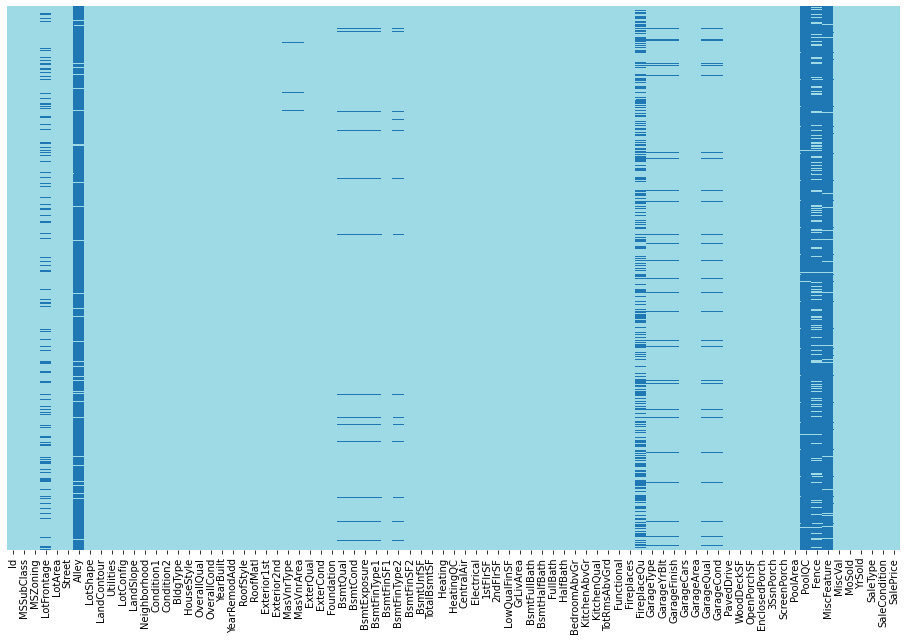

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

all the null values can be replaced other than alley, PoolQC, fireplaceQU,Fence,MiscFeature columsn as in all these columns the Null values are more than 80% of the whole data in that particular columns which is unacceptable for our data analysis.

In [8]:
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df_train.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','Utilities'],inplace=True)

In [10]:
for col in df_train.columns:
    df_train[col].fillna(df_train[col].mode()[0],inplace=True)

In [11]:
for col in ['LotFrontage']:
    df_train[col].fillna(df_train[col].mean(),inplace=True)

i am using this column to be replaced by mean as there are 214 null values are present which is more than the other columns.not including the columns which i have already dropped.

In [12]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,60.0,4928,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,Inside,Mod,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,CulDSac,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,60.0,16635,Pave,IR1,Lvl,FR2,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,60.0,9819,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,Reg,Lvl,FR2,Gtl,...,0,0,0,0,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Reg,Lvl,Inside,Gtl,...,172,0,0,0,0,7,2008,WD,Normal,40000


In [13]:
for column in df_train.columns:
    if df_train[column].dtypes==object:
        print(str(column)+ ':' +str(df_train[column].unique()))
        print(df_train[column].value_counts())
        print('__________________________________________________')
        print('\n')

MSZoning:['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
__________________________________________________


Street:['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64
__________________________________________________


LotShape:['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
__________________________________________________


LandContour:['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
__________________________________________________


LotConfig:['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
__________________________________________________


LandSlope:['Gtl' 'Mod' 'Sev']
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
___________________________________

In [14]:
df_train.isnull().values.any()

False

all the null values are treated now as i have dropped the columns which are having high null values and replaced the ones which are having low null values.

In [15]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,68.975171,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.836520,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,64.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


there are many outliers are present as there is a huge gap between 75% of value and the maximum value.
almost every column is right side skewed as mean is more than the median value.

In [16]:
df_train.shape

(1168, 75)

after droppin the irrelevant info and null values we have reduced the the columns to 75 from 81.

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

# exploratory data analysis

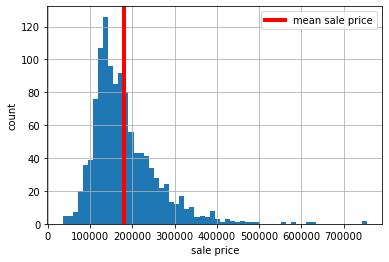

mean sale price: 181477.0059931507


In [18]:
price=df_train['SalePrice'].hist(bins=60)
mean_value=np.mean(df_train['SalePrice'])
plt.axvline(mean_value,linewidth=4,color='red',label='mean sale price')
plt.xlabel('sale price')
plt.ylabel('count')
plt.legend()
plt.show()
print('mean sale price:',np.mean(df_train['SalePrice']))

values for salecondition: Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


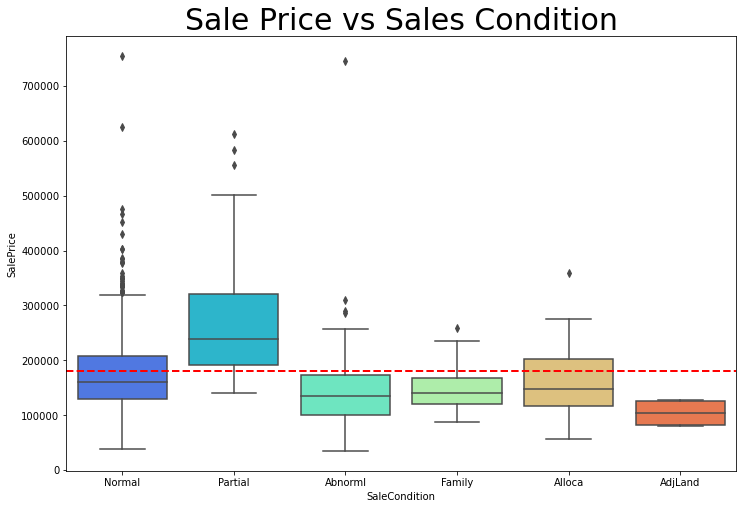

In [19]:
plt.figure(figsize=(12,8))
mean_value=np.mean(df_train['SalePrice'])
sns.boxplot(y='SalePrice',x='SaleCondition',data=df_train,palette='rainbow')
plt.axhline(mean_value,color='red',linestyle='dashed',linewidth=2)
plt.title('Sale Price vs Sales Condition',fontsize=30)
print('values for salecondition:',df_train['SaleCondition'].value_counts())
plt.show()

as we can see partial salecondition is priced high as compared to others while adjland is valued the lowest saleprice

values for GarageType: Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


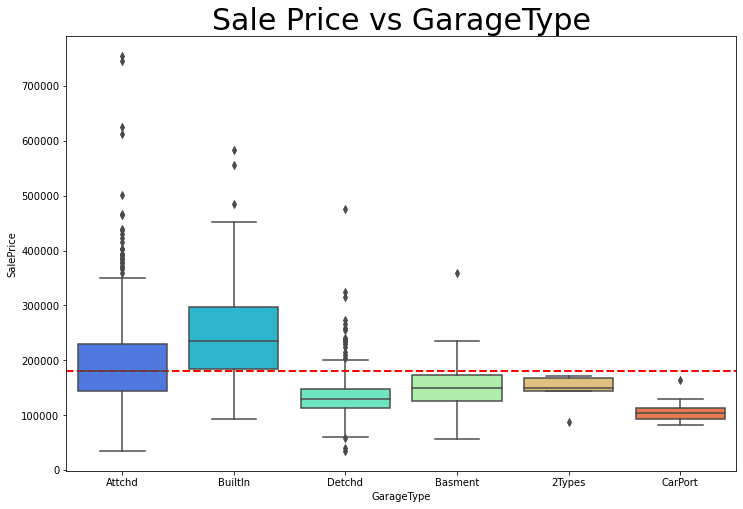

In [20]:
plt.figure(figsize=(12,8))
mean_value=np.mean(df_train['SalePrice'])
sns.boxplot(y='SalePrice',x='GarageType',data=df_train,palette='rainbow')
plt.axhline(mean_value,color='red',linestyle='dashed',linewidth=2)
plt.title('Sale Price vs GarageType',fontsize=30)
print('values for GarageType:',df_train['GarageType'].value_counts())
plt.show()

values for CentralAir: Y    1090
N      78
Name: CentralAir, dtype: int64


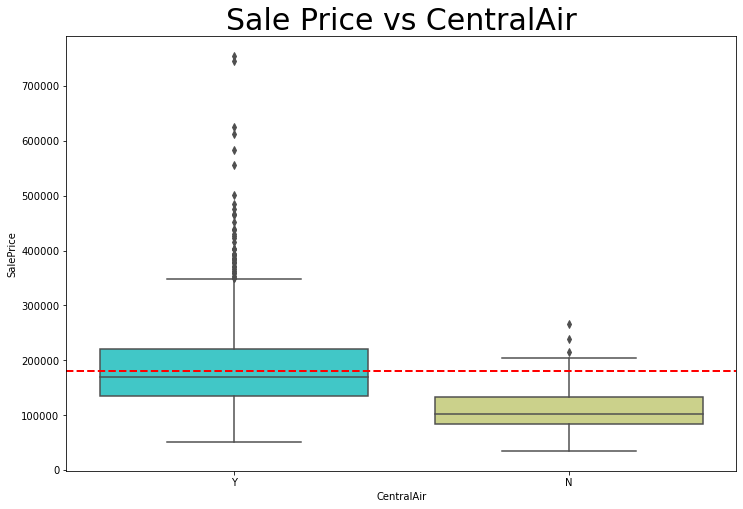

In [21]:
plt.figure(figsize=(12,8))
mean_value=np.mean(df_train['SalePrice'])
sns.boxplot(y='SalePrice',x='CentralAir',data=df_train,palette='rainbow')
plt.axhline(mean_value,color='red',linestyle='dashed',linewidth=2)
plt.title('Sale Price vs CentralAir',fontsize=30)
print('values for CentralAir:',df_train['CentralAir'].value_counts())
plt.show()

values for LotConfig: Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


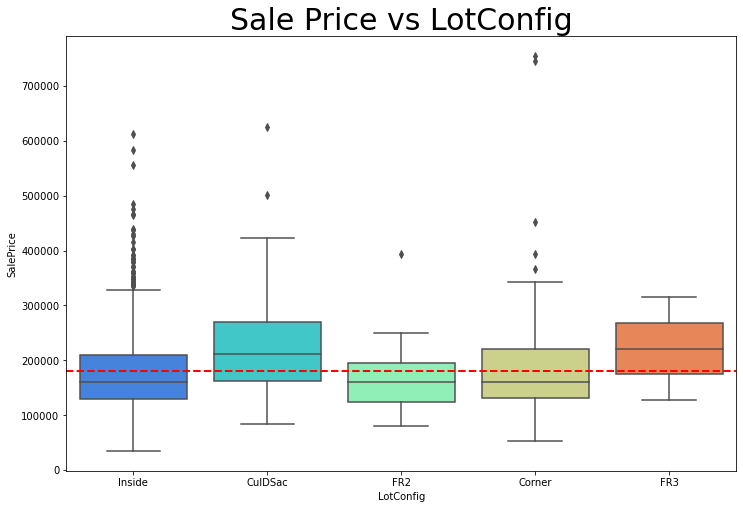

In [22]:
plt.figure(figsize=(12,8))
mean_value=np.mean(df_train['SalePrice'])
sns.boxplot(y='SalePrice',x='LotConfig',data=df_train,palette='rainbow')
plt.axhline(mean_value,color='red',linestyle='dashed',linewidth=2)
plt.title('Sale Price vs LotConfig',fontsize=30)
print('values for LotConfig:',df_train['LotConfig'].value_counts())
plt.show()

values for Neighborhood: NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


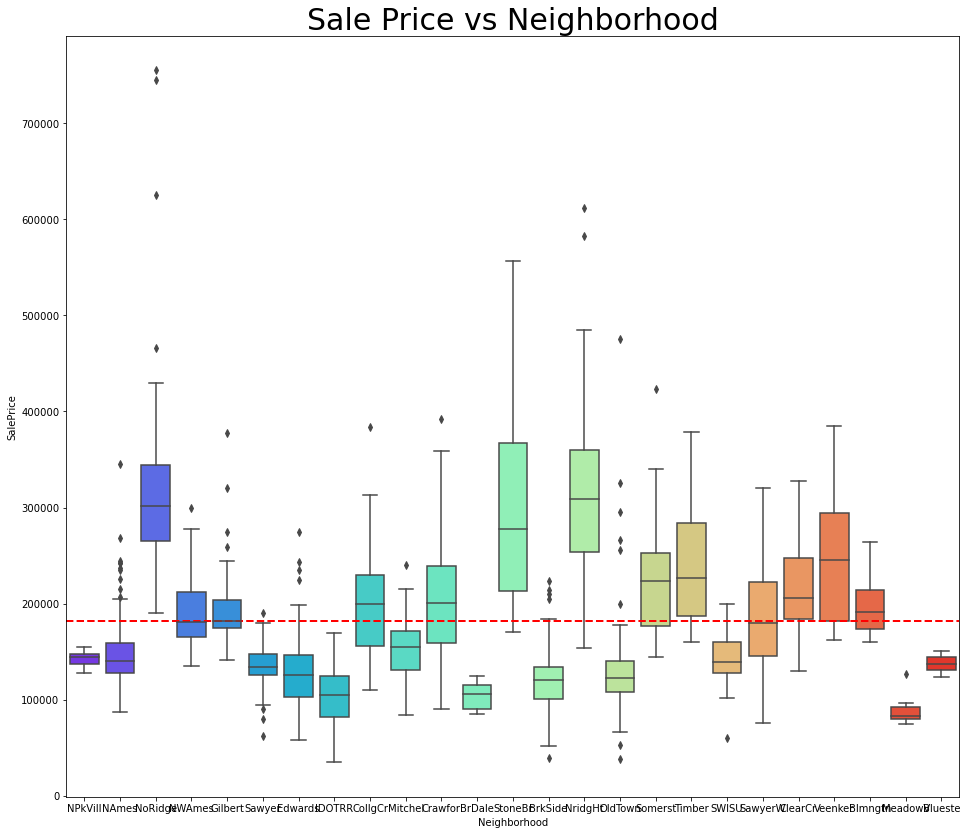

In [23]:
plt.figure(figsize=(16,14))
mean_value=np.mean(df_train['SalePrice'])
sns.boxplot(y='SalePrice',x='Neighborhood',data=df_train,palette='rainbow')
plt.axhline(mean_value,color='red',linestyle='dashed',linewidth=2)
plt.title('Sale Price vs Neighborhood',fontsize=30)
print('values for Neighborhood:',df_train['Neighborhood'].value_counts())
plt.show()

values for Fireplaces: 0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64


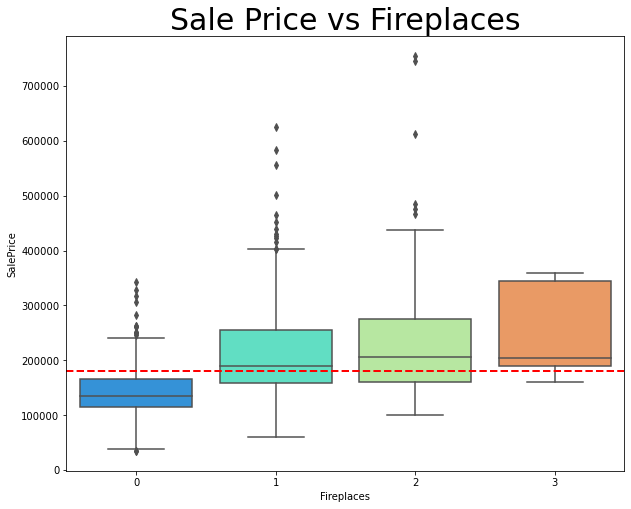

In [24]:
plt.figure(figsize=(10,8))
mean_value=np.mean(df_train['SalePrice'])
sns.boxplot(y='SalePrice',x='Fireplaces',data=df_train,palette='rainbow')
plt.axhline(mean_value,color='red',linestyle='dashed',linewidth=2)
plt.title('Sale Price vs Fireplaces',fontsize=30)
print('values for Fireplaces:',df_train['Fireplaces'].value_counts())
plt.show()

higher the fireplaces higher the sale price of the house.

values for HouseStyle: 1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


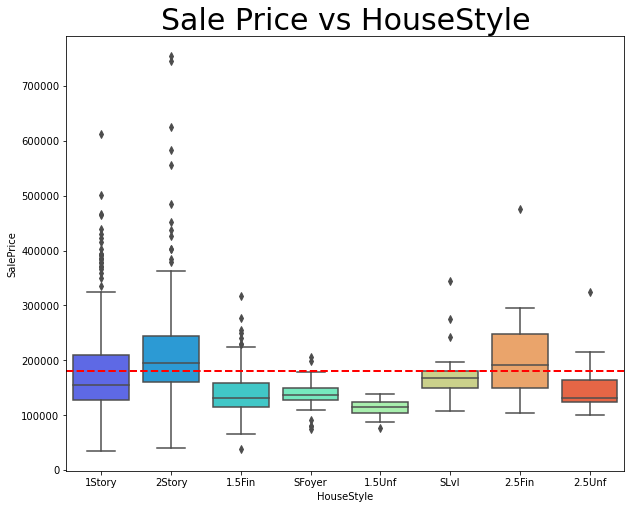

In [25]:
plt.figure(figsize=(10,8))
mean_value=np.mean(df_train['SalePrice'])
sns.boxplot(y='SalePrice',x='HouseStyle',data=df_train,palette='rainbow')
plt.axhline(mean_value,color='red',linestyle='dashed',linewidth=2)
plt.title('Sale Price vs HouseStyle',fontsize=30)
print('values for HouseStyle:',df_train['HouseStyle'].value_counts())
plt.show()

values for YrSold: 2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64


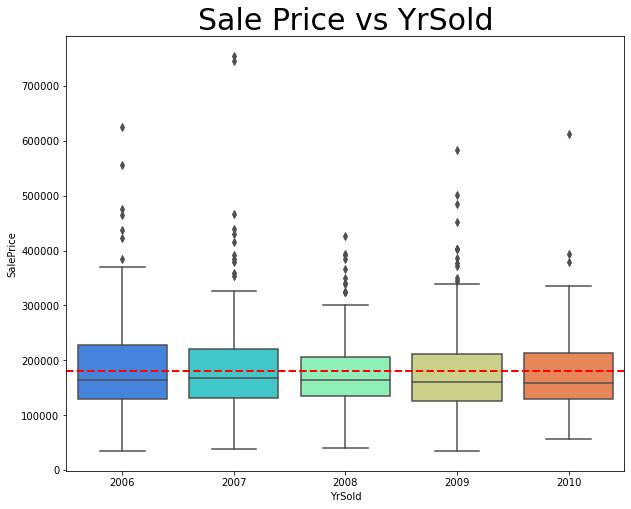

In [26]:
plt.figure(figsize=(10,8))
mean_value=np.mean(df_train['SalePrice'])
sns.boxplot(y='SalePrice',x='YrSold',data=df_train,palette='rainbow')
plt.axhline(mean_value,color='red',linestyle='dashed',linewidth=2)
plt.title('Sale Price vs YrSold',fontsize=30)
print('values for YrSold:',df_train['YrSold'].value_counts())
plt.show()

Text(0.5, 1.0, 'Correlation with the target Variable')

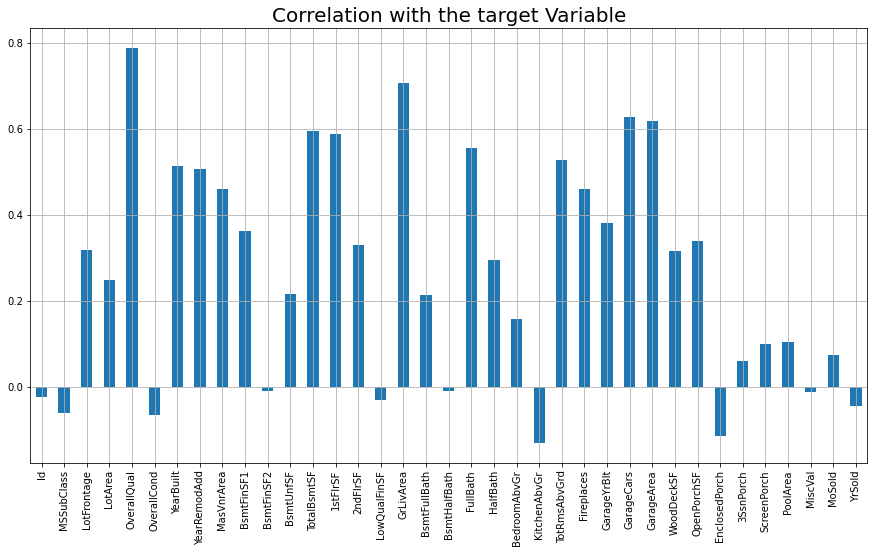

In [27]:
plt.figure(figsize=(15,8))
df_train.drop('SalePrice',axis=1).corrwith(df_train['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title('Correlation with the target Variable',fontsize=20)

this analysis indicates the numerical behaviour of the data in relation with our target variable. as we can see OverallQual is highly correlated with the target variable whereas KitchenAbvGrd is negatively correlated with our target variable.

In [28]:
le=LabelEncoder()

In [29]:
for column in df_train.columns:
    if df_train[column].dtypes==object:
        df_train[column]=le.fit_transform(df_train[column])

In [30]:
df_train['YrSold']=le.fit_transform(df_train['YrSold'])

i am coverting this column as it is in year format.

In [31]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,60.0,4928,1,0,3,4,0,...,0,0,0,0,0,2,1,8,4,128000
1,889,20,3,95.0,15865,1,0,3,4,1,...,0,0,224,0,0,10,1,8,4,268000
2,793,60,3,92.0,9920,1,0,3,1,0,...,0,0,0,0,0,6,1,8,4,269790
3,110,20,3,105.0,11751,1,0,3,4,0,...,0,0,0,0,0,1,4,0,4,190000
4,422,20,3,60.0,16635,1,0,3,2,0,...,0,0,0,0,0,6,3,8,4,215000


in our training data all the values, nominal catogorical data has been converted.

# treating the test dataset 

In [32]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

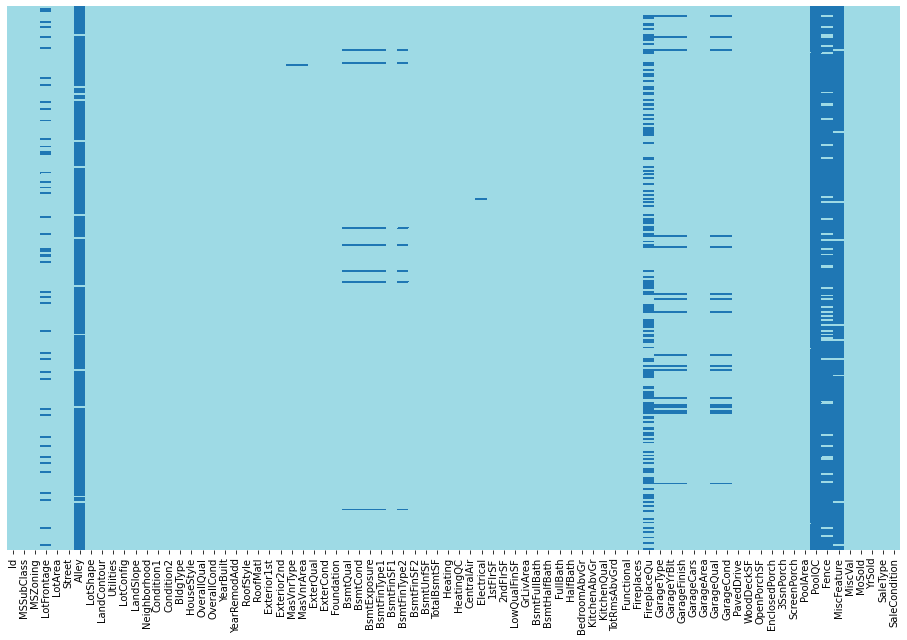

In [33]:
plt.figure(figsize=(16,10))
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

In [34]:
df_test.drop(columns=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','Utilities'],inplace=True)

In [35]:
for col in df_test.columns:
    df_test[col].fillna(df_test[col].mode()[0],inplace=True)
for col in ['LotFrontage']:
    df_test[col].fillna(df_test[col].mean(),inplace=True)
for column in df_test.columns:
    if df_test[column].dtypes==object:
        print(str(column)+ ':' +str(df_test[column].unique()))
        print(df_test[column].value_counts())
        print('__________________________________________________')
        print('\n')
print('df_test shape:',df_test.shape)

MSZoning:['RL' 'RM' 'FV' 'C (all)']
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
__________________________________________________


Street:['Pave' 'Grvl']
Pave    290
Grvl      2
Name: Street, dtype: int64
__________________________________________________


LotShape:['IR1' 'Reg' 'IR3' 'IR2']
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64
__________________________________________________


LandContour:['HLS' 'Lvl' 'Bnk' 'Low']
Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64
__________________________________________________


LotConfig:['Corner' 'CulDSac' 'Inside' 'FR2' 'FR3']
Inside     210
Corner      41
CulDSac     25
FR2         14
FR3          2
Name: LotConfig, dtype: int64
__________________________________________________


LandSlope:['Gtl' 'Mod' 'Sev']
Gtl    277
Mod     14
Sev      1
Name: LandSlope, dtype: int64
__________________________________________________


Neighborhoo

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodA

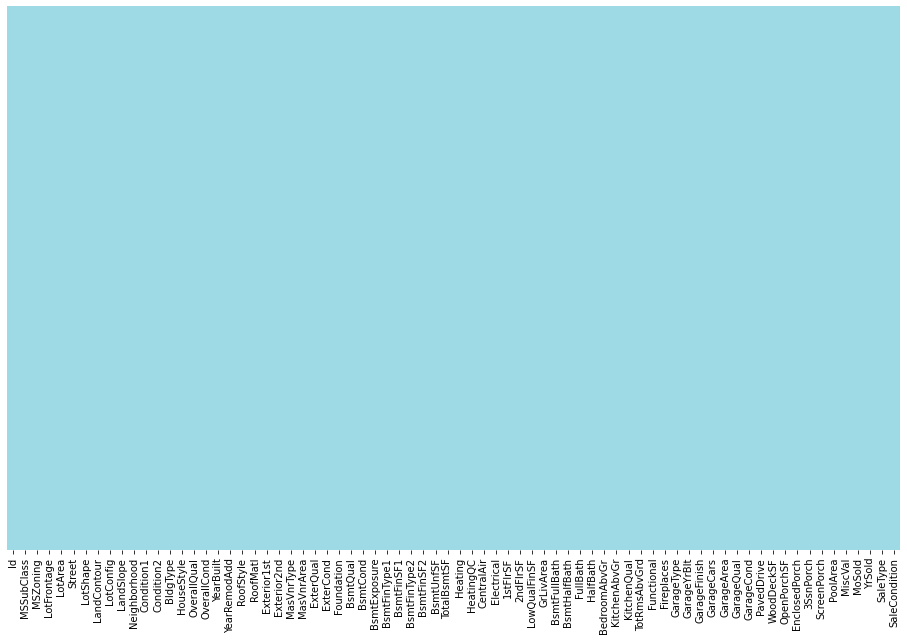

In [37]:
plt.figure(figsize=(16,10))
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

after the treatment there is no null value present in our test dataset

# now both the data is ready for the further model building process

# removing outliers

In [38]:
z=np.abs(zscore(df_train))
z

array([[1.43548658, 1.50830058, 0.02164599, ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.39632483, 0.87704243, 0.02164599, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.16554544, 0.07709478, 0.02164599, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [1.26961389, 2.46243779, 0.02164599, ..., 0.33003329, 0.20793187,
        0.41705186],
       [1.66626597, 0.31562908, 4.76211672, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.25755011, 0.07709478, 0.02164599, ..., 0.33003329, 0.20793187,
        0.02179027]])

In [39]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 9, 20, 34, ..., 39, 61, 62], dtype=int64))


In [40]:
train=df_train[(z<3).all(axis=1)]
print('df_train shape:',df_train.shape,'\n','train shape:',train.shape)

df_train shape: (1168, 75) 
 train shape: (482, 75)


as we can see all the outliers present in our dataset has been removed and the new shape for the train data is (482,75)

# feature selection

In [41]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Encl

In [42]:
x=train.drop(columns=['SalePrice'],axis=1)
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,127,120,3,60.0,4928,1,0,3,4,0,...,205,0,0,0,0,0,2,1,8,4
2,793,60,3,92.0,9920,1,0,3,1,0,...,130,0,0,0,0,0,6,1,8,4
5,1197,60,3,58.0,14054,1,0,3,4,0,...,17,0,0,0,0,0,11,0,6,5
6,561,20,3,60.0,11341,1,0,3,4,0,...,0,0,0,95,0,0,5,4,8,4
11,833,60,3,44.0,9548,1,0,3,1,0,...,39,0,0,0,0,0,1,4,8,4


In [43]:
y=train['SalePrice']
y.head()

0     128000
2     269790
5     219210
6     121500
11    237000
Name: SalePrice, dtype: int64

In [44]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

x_train shape: (385, 74)
x_test shape: (97, 74)
y_train shape: (385,)
y_test shape: (97,)


In [46]:
model=model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),
             AdaBoostRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor()]

In [47]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=42)
    m.fit(x_train,y_train)
    print('the score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('the mean absolute error of',m,'is:',mean_absolute_error(y_test,predm))
    print('the mean squared error of',m,'is:',mean_squared_error(y_test,predm))
    print('the root mean squared of',m,'is:',np.sqrt(mean_squared_error(y_test,predm)))
    print('the r2 score of',m,'is:',r2_score(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

the score of LinearRegression() is: 0.9169334386757488
the mean absolute error of LinearRegression() is: 13434.550149994979
the mean squared error of LinearRegression() is: 292988656.38375515
the root mean squared of LinearRegression() is: 17116.91141484804
the r2 score of LinearRegression() is: 0.9090572089415695
*****************************************************************************************


the score of Lasso() is: 0.9169254946549195
the mean absolute error of Lasso() is: 13428.531169279086
the mean squared error of Lasso() is: 292770129.95242625
the root mean squared of Lasso() is: 17110.526875360276
the r2 score of Lasso() is: 0.9091250388836238
*****************************************************************************************


the score of Ridge() is: 0.9169143756110242
the mean absolute error of Ridge() is: 13430.568781664257
the mean squared error of Ridge() is: 291617018.7550788
the root mean squared of Ridge() is: 17076.797672721863
the r2 score of Ridge() 

# cross validation

In [48]:
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Model',m)
    print('score',score)
    print('mean score of',m,'is:',score.mean())
    print('standard deviation of',m,'is-',score.std())
    print('**************************************************************')
    print('\n')

Model LinearRegression()
score [-2.63405018e+20  9.11413502e-01  9.23223389e-01  8.84001083e-01
  8.60699644e-01  8.37163890e-01  9.26294713e-01  9.21612454e-01
  8.35667840e-01  9.21204985e-01]
mean score of LinearRegression() is: -2.6340501836014686e+19
standard deviation of LinearRegression() is- 7.902150550804405e+19
**************************************************************


Model Lasso()
score [0.88677169 0.91134197 0.92323617 0.88409671 0.86073835 0.83711092
 0.92624535 0.92165919 0.83563556 0.92134008]
mean score of Lasso() is: 0.8908175978120969
standard deviation of Lasso() is- 0.03392039310339326
**************************************************************


Model Ridge()
score [0.88736886 0.91163874 0.92341101 0.88547009 0.86122111 0.83699099
 0.92618182 0.92174782 0.83535583 0.92150385]
mean score of Ridge() is: 0.8910890121908753
standard deviation of Ridge() is- 0.03396147751622052
**************************************************************


Model ElasticNet()

# in this model building Randomforest Regressor is giving the best score and r2 score so i am choosing this model as for my final model

using grid seach cv to get best parameters

In [49]:
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFR=RandomForestRegressor()
clf=GridSearchCV(RFR,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 600}


In [50]:
rf=RandomForestRegressor(n_estimators=500, max_depth=16, min_samples_split=6, min_samples_leaf=1,max_features='auto')
rf.fit(x_train,y_train)
print('the score of',rf,'is:',rf.score(x_train,y_train))
print('\n')
predrf=rf.predict(x_test)
print('the mean absolute error is:',mean_absolute_error(y_test,predrf))
print('the mean squared error is:',mean_squared_error(y_test,predrf))
print('the root mean squared is:',np.sqrt(mean_squared_error(y_test,predrf)))
print('the r2 score is:',r2_score(y_test,predrf))
print('*****************************************************************************************')
print('\n')

the score of RandomForestRegressor(max_depth=16, min_samples_split=6, n_estimators=500) is: 0.9740098295599986


the mean absolute error is: 13860.382676975298
the mean squared error is: 346514349.3855498
the root mean squared is: 18614.895900475774
the r2 score is: 0.8924429960399475
*****************************************************************************************




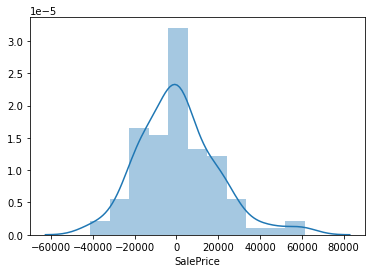

In [51]:
sns.distplot(y_test-predrf)

Text(0.5, 1.0, 'scatter plot between testdata and predicted data')

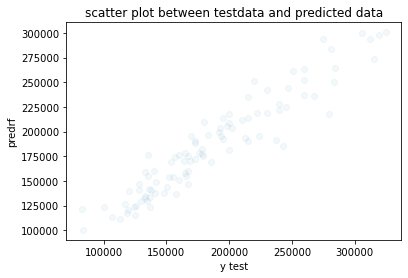

In [52]:
plt.scatter(y_test,predrf,alpha=0.05)
plt.xlabel('y test')
plt.ylabel('predrf')
plt.title('scatter plot between testdata and predicted data')

In [53]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predrf})  
df 

,Actual,Predicted
1009,152000,154491.512121
1152,136500,141910.441848
453,240000,222212.817486
1071,239500,227845.565570
727,128000,146939.783797
...,...,...
543,220000,251154.522595
972,117000,126847.554751
780,183000,196373.004120
807,268000,236188.503747


In [55]:
import joblib
joblib.dump(df,'housing saleprice prediction.pkl')

['housing saleprice prediction.pkl']